In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import cv2
import os
from google.colab import drive
from sklearn.model_selection import train_test_split

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(5, activation='softmax')
    ])

    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [ ]:
def prepare_dataset(base_dir):
    X = []
    y = []

    for person_id, folder in enumerate(os.listdir(base_dir)):
        folder_path = os.path.join(base_dir, folder)
        if os.path.isdir(folder_path):
            for image_file in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_file)
                image = cv2.imread(image_path)
                if image is not None:
                    image = cv2.resize(image, (64, 64))
                    X.append(image)
                    y.append(person_id)

    X = np.array(X) / 255.0
    y = np.array(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [ ]:
def train_model(base_dir):
    model = create_model()
    X_train, X_test, y_train, y_test = prepare_dataset(base_dir)

    history = model.fit(X_train, y_train,
                       epochs=6,
                       batch_size=6,
                       validation_data=(X_test, y_test))

     #model.save('/content/drive/MyDrive/fa_recognition_model.h5')
     # Evaluate model accuracy
    accuracy = model.evaluate(X_test, y_test)[1]
    print(f"Test Accuracy: {accuracy}")
    return model, history

In [ ]:
def predict_face(model, image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (64, 64))
    image = np.expand_dims(image, axis=0) / 255.0

    prediction = model.predict(image)
    person_id = np.argmax(prediction)
    confidence = prediction[0][person_id]

    return person_id, confidence

In [ ]:
# Main execution
dataset_path = '/content/drive/MyDrive/AIproject'  # Replace with your folder path

model, history = train_model(dataset_path)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5685 - loss: 1.1502 - val_accuracy: 0.8660 - val_loss: 0.5172
Epoch 2/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9126 - loss: 0.2755 - val_accuracy: 0.9072 - val_loss: 0.2339
Epoch 3/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9585 - loss: 0.1143 - val_accuracy: 0.9794 - val_loss: 0.1208
Epoch 4/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9788 - loss: 0.0540 - val_accuracy: 0.8660 - val_loss: 0.3561
Epoch 5/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9585 - loss: 0.1087 - val_accuracy: 0.8969 - val_loss: 0.2634
Epoch 6/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9852 - loss: 0.0904 - val_accuracy: 0.9381 - val_loss: 0.1689
Epoch 7/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 0.9588 - val_loss: 0.0979
Epoch 8/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.3997e-04 - val_accuracy: 0.9588 - val_

In [ ]:
import matplotlib.pyplot as plt
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

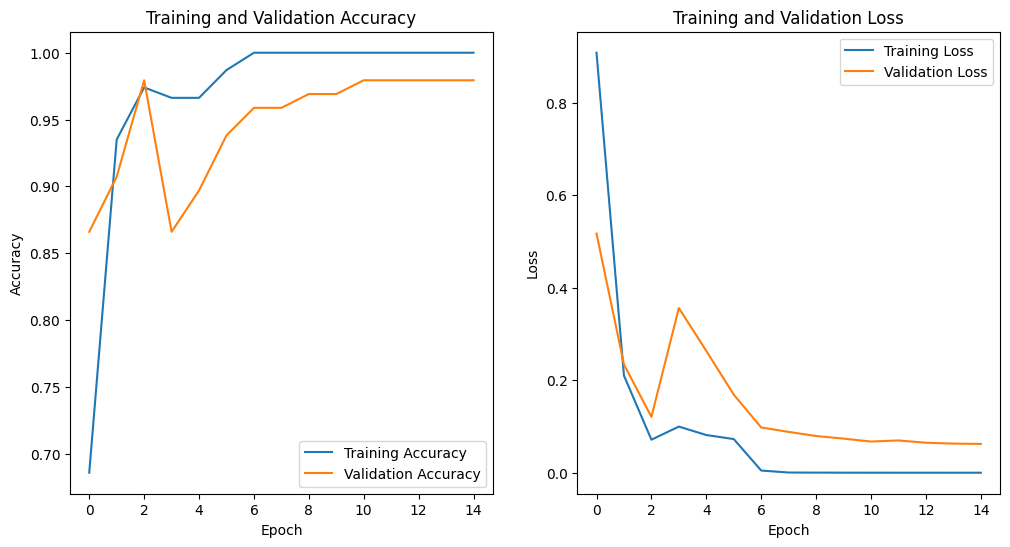

In [ ]:
plot_training_history(history)

Epoch 1/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4759 - loss: 1.2439 - val_accuracy: 0.8351 - val_loss: 0.4865
Epoch 2/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8683 - loss: 0.3554 - val_accuracy: 0.9072 - val_loss: 0.2767
Epoch 3/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8877 - loss: 0.3912 - val_accuracy: 0.8660 - val_loss: 0.4437
Epoch 4/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9718 - loss: 0.1165 - val_accuracy: 0.9175 - val_loss: 0.3436
Epoch 5/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9845 - loss: 0.0542 - val_accuracy: 0.9381 - val_loss: 0.1419
Epoch 6/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9976 - loss: 0.0080 - val_accuracy: 0.9588 - val_loss: 0.1358
Epoch 7/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9588 - val_loss: 0.1579
Epoch 8/15
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 7.7886e-04 - val_accuracy: 0.9588 - val_

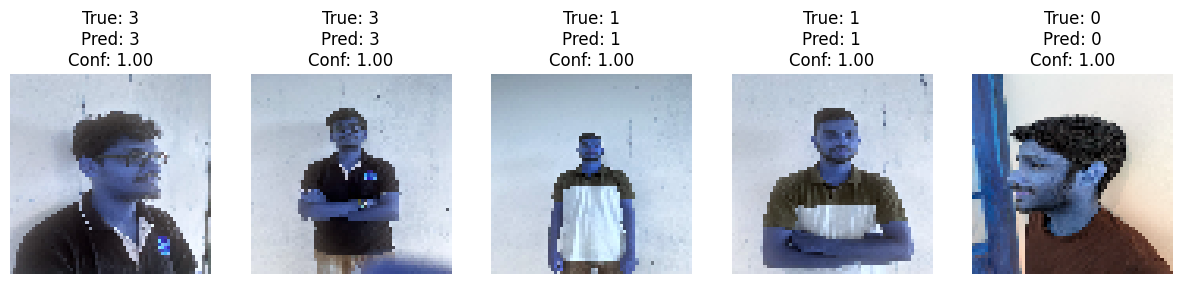

In [ ]:
import random
import matplotlib.pyplot as plt

def plot_random_images(model, X_test, y_test, num_images=5):
    plt.figure(figsize=(15, 8))
    for i in range(num_images):
        index = random.randint(0, len(X_test) - 1)
        test_image = X_test[index].reshape(1, 64, 64, 3)
        true_label = y_test[index]

        prediction = model.predict(test_image)
        predicted_label = np.argmax(prediction[0])
        confidence = prediction[0][predicted_label]

        plt.subplot(1, num_images, i+1)
        plt.imshow(X_test[index])
        plt.title(f'True: {true_label}\nPred: {predicted_label}\nConf: {confidence:.2f}')
        plt.axis('off')
    plt.show()

# Main execution
dataset_path = '/content/drive/MyDrive/AIproject'  # Replace with your folder path
model, history = train_model(dataset_path)

# Get X_test and y_test from prepare_dataset
X_train, X_test, y_train, y_test = prepare_dataset(dataset_path) # Calling prepare_dataset to get X_test, y_test

# Now call plot_random_images with X_test and y_test
plot_random_images(model, X_test, y_test)